# Time Series Forecasting of Temperatures using SARIMA: An Example from Nanjing

In [147]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Preparing the Data

In [148]:
temp = pd.read_csv("nanjing_daily_summary.csv")

In [149]:
temp

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,CHM00058238,"NANJING, CH",1951-01-01,0.00,NaN,NaN,53.0,38.0
1,CHM00058238,"NANJING, CH",1951-01-02,0.01,NaN,42.0,45.0,39.0
2,CHM00058238,"NANJING, CH",1951-01-03,0.00,NaN,44.0,52.0,40.0
3,CHM00058238,"NANJING, CH",1951-01-04,0.00,NaN,44.0,58.0,34.0
4,CHM00058238,"NANJING, CH",1951-01-05,0.00,NaN,49.0,62.0,40.0
...,...,...,...,...,...,...,...,...
26341,CHM00058238,"NANJING, CH",2023-02-16,0.01,NaN,45.0,50.0,33.0
26342,CHM00058238,"NANJING, CH",2023-02-17,0.00,NaN,49.0,NaN,35.0
26343,CHM00058238,"NANJING, CH",2023-02-18,0.00,NaN,50.0,NaN,NaN
26344,CHM00058238,"NANJING, CH",2023-02-19,0.00,NaN,42.0,56.0,NaN


In [150]:
temp['DATE'] = pd.to_datetime(temp['DATE'])

In [151]:
temp.set_index('DATE', inplace=True)

In [152]:
temp

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
1951-01-01,CHM00058238,"NANJING, CH",0.00,NaN,NaN,53.0,38.0
1951-01-02,CHM00058238,"NANJING, CH",0.01,NaN,42.0,45.0,39.0
1951-01-03,CHM00058238,"NANJING, CH",0.00,NaN,44.0,52.0,40.0
1951-01-04,CHM00058238,"NANJING, CH",0.00,NaN,44.0,58.0,34.0
1951-01-05,CHM00058238,"NANJING, CH",0.00,NaN,49.0,62.0,40.0
...,...,...,...,...,...,...,...
2023-02-16,CHM00058238,"NANJING, CH",0.01,NaN,45.0,50.0,33.0
2023-02-17,CHM00058238,"NANJING, CH",0.00,NaN,49.0,NaN,35.0
2023-02-18,CHM00058238,"NANJING, CH",0.00,NaN,50.0,NaN,NaN


In [153]:
# remove all the unnecessary columns
temp.drop(["STATION","NAME","PRCP","SNWD", "TMAX", "TMIN"], axis=1, inplace=True)

In [154]:
temp

,TAVG
DATE,
1951-01-01,NaN
1951-01-02,42.0
1951-01-03,44.0
1951-01-04,44.0
1951-01-05,49.0
...,...
2023-02-16,45.0
2023-02-17,49.0
2023-02-18,50.0


In [155]:
# check percentage of missing values
temp.apply(pd.isnull).sum()/temp.shape[0]

TAVG    0.000038
dtype: float64

In [156]:
# check missing values for TAVG
temp[pd.isnull(temp["TAVG"])]
temp

,TAVG
DATE,
1951-01-01,NaN
1951-01-02,42.0
1951-01-03,44.0
1951-01-04,44.0
1951-01-05,49.0
...,...
2023-02-16,45.0
2023-02-17,49.0
2023-02-18,50.0


In [157]:
# only first row missing, can remove
temp = temp.drop("1951-01-01")

In [158]:
temp

,TAVG
DATE,
1951-01-02,42.0
1951-01-03,44.0
1951-01-04,44.0
1951-01-05,49.0
1951-01-06,46.0
...,...
2023-02-16,45.0
2023-02-17,49.0
2023-02-18,50.0


In [159]:
# Converting daily TAVG to monthly mean TAVG
temp = temp.resample('M').mean()

In [160]:
temp

,TAVG
DATE,
1951-01-31,36.066667
1951-02-28,38.678571
1951-03-31,45.580645
1951-04-30,54.900000
1951-05-31,69.258065
...,...
2022-10-31,62.838710
2022-11-30,57.000000
2022-12-31,38.741935


In [161]:
# convert TAVG from farenheit to celsius
temp['TAVG'] = (temp['TAVG'] - 32) * 5/9

In [162]:
temp

,TAVG
DATE,
1951-01-31,2.259259
1951-02-28,3.710317
1951-03-31,7.544803
1951-04-30,12.722222
1951-05-31,20.698925
...,...
2022-10-31,17.132616
2022-11-30,13.888889
2022-12-31,3.745520


In [163]:
# checking for correct datatypes
temp.dtypes

TAVG    float64
dtype: object

In [164]:
temp.index

DatetimeIndex(['1951-01-31', '1951-02-28', '1951-03-31', '1951-04-30',
               '1951-05-31', '1951-06-30', '1951-07-31', '1951-08-31',
               '1951-09-30', '1951-10-31',
               ...
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28'],
              dtype='datetime64[ns]', name='DATE', length=866, freq='M')

In [165]:
# according to data set documentation:
# "Note: 9’s in a field (e.g.9999) indicate missing data or data that has not been received"
# check if there is any 9999 value in the data set
temp.apply(lambda x: (x==9999).sum())

TAVG    0
dtype: int64

<AxesSubplot:xlabel='DATE'>

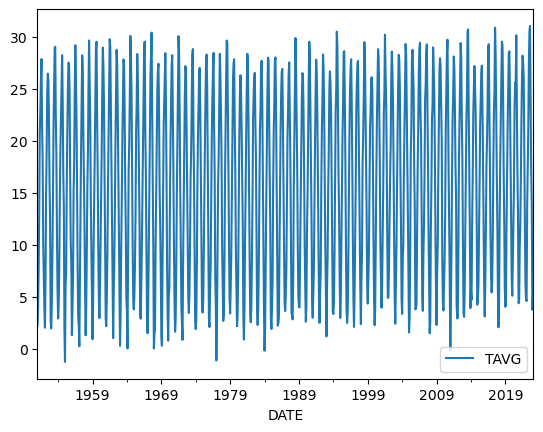

In [166]:
temp.plot()

## Normalisation of data

In [167]:
# from sklearn.preprocessing import MinMaxScaler

# # Create a scaler object and fit it to the temperature column
# scaler = MinMaxScaler()
# scaler.fit(temp[['TAVG']])

# # Transform the temperature column using the fitted scaler
# temp['TAVG'] = scaler.transform(temp[['TAVG']])

# temp


<AxesSubplot:xlabel='DATE'>

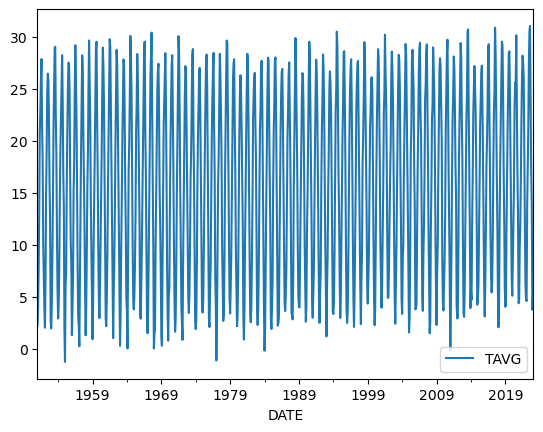

In [168]:
temp.plot()

## ACF and PACF
The ACF and PACF are used to determine if an AR (p) or MA (q) model is appropriated and determine possible candidate models.

ACF measures the correlation between a time series and its lagged values, while PACF measures the correlation between a time series and its lagged values, controlling for the effect of the intervening lags.

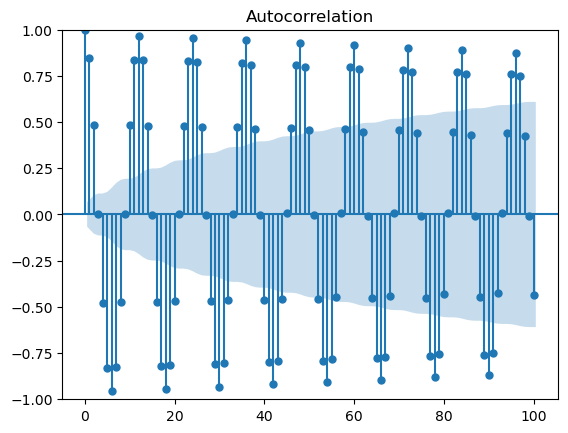

In [169]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(temp, lags=100)
plt.show()

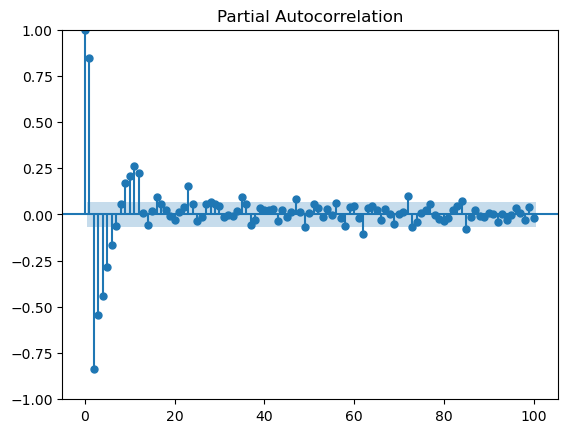

In [170]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(temp, lags=100, method='ywm')
plt.show()

From the ACF and PACF plots we can conclude that _____.

## Grid Search
asdkjashaskjdhakhjaskh

## Splitting the data

In [171]:
# 40:60 train test split
# 50:50 train test split
# 60:40 train test split
# 70:30 train test split
# 80:20 train test split
# 90:10 train test split
# respectively
# train, test = train_test_split(temp['TAVG'], test_size=0.2, random_state=42, shuffle=False)
train3070, test3070 = train_test_split(temp['TAVG'], test_size=0.7, random_state=42, shuffle=False)
train4060, test4060 = train_test_split(temp['TAVG'], test_size=0.59, random_state=42, shuffle=False)
train5050, test5050 = train_test_split(temp['TAVG'], test_size=0.5, random_state=42, shuffle=False)
train6040, test6040 = train_test_split(temp['TAVG'], test_size=0.4, random_state=42, shuffle=False)
train7030, test7030 = train_test_split(temp['TAVG'], test_size=0.298, random_state=42, shuffle=False)
train8020, test8020 = train_test_split(temp['TAVG'], test_size=0.2, random_state=42, shuffle=False)
train9010, test9010 = train_test_split(temp['TAVG'], test_size=0.1, random_state=42, shuffle=False)

# January 1980 to December 2015
# January 2015 to December 2017
trainR = temp.loc["1980-1-31":"2015-12-31"]
testR = temp.loc["2015-1-31":"2017-12-31"]

in the study, the researchers utilised a 95:5 train test split, which is typically advised against

## Using auto_arima to determine parameters

In [172]:
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [173]:
# 30:70 parameters

# use auto_arima to determine SARIMA parameters
sarima_model = pm.auto_arima(train3070, seasonal=True, m=12, 
                             stepwise=True, suppress_warnings=True,
                             error_action="ignore", max_order=None,
                             trace=True)

# print out the selected model parameters
print(sarima_model.order)
print(sarima_model.seasonal_order)

# create and fit SARIMA model using the selected parameters
model3070 = SARIMAX(train3070, order=sarima_model.order, seasonal_order=sarima_model.seasonal_order)
results3070 = model3070.fit()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1887.958, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1470.715, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2227.941, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1626.603, Time=0.05 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1010.016, Time=0.57 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1096.338, Time=0.30 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=993.486, Time=2.81 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1352.728, Time=0.56 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=2.05 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.81 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=976.147, Time=1.64 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=129

 This problem is unconstrained.



At iterate   20    f=  1.89362D+00    |proj g|=  2.58680D-02

At iterate   25    f=  1.87906D+00    |proj g|=  1.19164D-02

At iterate   30    f=  1.87878D+00    |proj g|=  1.54103D-03

At iterate   35    f=  1.87877D+00    |proj g|=  9.23898D-04
  ys=-1.747E-06  -gs= 7.774E-07 BFGS update SKIPPED

At iterate   40    f=  1.87877D+00    |proj g|=  1.01106D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41    114      2     1     0   8.373D-04   1.879D+00
  F =   1.8787729952109073     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


In [174]:
# 40:60 parameters

# use auto_arima to determine SARIMA parameters
sarima_model = pm.auto_arima(train4060, seasonal=True, m=12, 
                             stepwise=True, suppress_warnings=True,
                             error_action="ignore", max_order=None,
                             trace=True)

# print out the selected model parameters
print(sarima_model.order)
print(sarima_model.seasonal_order)

# create and fit SARIMA model using the selected parameters
model4060 = SARIMAX(train4060, order=sarima_model.order, seasonal_order=sarima_model.seasonal_order)
results4060 = model4060.fit()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1298.672, Time=1.54 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2582.225, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1990.423, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3052.877, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=inf, Time=2.75 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=1281.647, Time=4.31 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.87 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=3.23 sec
 ARIMA(1,0,2)(1,0,2)[12] intercept   : AIC=1279.285, Time=2.43 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=1726.568, Time=0.94 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=1285.470, Time=0.87 sec
 ARIMA(1,0,2)(2,0,2)[12] intercept   : AIC=inf, T

 This problem is unconstrained.



At iterate    5    f=  1.79757D+00    |proj g|=  3.20290D-02

At iterate   10    f=  1.78941D+00    |proj g|=  9.35005D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     13     43      1     0     0   4.496D-03   1.789D+00
  F =   1.7894112173487471     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [175]:
# 50:50 parameters

# use auto_arima to determine SARIMA parameters
sarima_model = pm.auto_arima(train5050, seasonal=True, m=12, 
                             stepwise=True, suppress_warnings=True,
                             error_action="ignore", max_order=None,
                             trace=True)

# print out the selected model parameters
print(sarima_model.order)
print(sarima_model.seasonal_order)

# create and fit SARIMA model using the selected parameters
model5050 = SARIMAX(train5050, order=sarima_model.order, seasonal_order=sarima_model.seasonal_order)
results5050 = model5050.fit()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3148.082, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2408.449, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3720.877, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2705.148, Time=0.06 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=2278.567, Time=0.78 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1753.441, Time=0.58 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=1630.556, Time=1.79 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.98 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=1645.229, Time=2.29 sec
 ARIMA(0,0,2)(2,0,0)[12] intercept   : AIC=1632.271, Time=1.91 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=16

/Users/jason/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(1,0,3)(1,0,2)[12] intercept   : AIC=1517.143, Time=3.30 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=2.64 sec
 ARIMA(0,0,3)(1,0,2)[12] intercept   : AIC=inf, Time=3.53 sec
 ARIMA(2,0,1)(1,0,2)[12] intercept   : AIC=1516.058, Time=2.97 sec
 ARIMA(2,0,3)(1,0,2)[12] intercept   : AIC=1518.692, Time=3.37 sec
 ARIMA(1,0,2)(1,0,2)[12]             : AIC=1525.321, Time=2.96 sec

Best model:  ARIMA(1,0,2)(1,0,2)[12] intercept
Total fit time: 53.515 seconds
(1, 0, 2)
(1, 0, 2, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66681D+00    |proj g|=  2.75452D-01


 This problem is unconstrained.



At iterate    5    f=  1.84461D+00    |proj g|=  3.93259D-01

At iterate   10    f=  1.75703D+00    |proj g|=  1.72565D-02

At iterate   15    f=  1.75379D+00    |proj g|=  1.32506D-02

At iterate   20    f=  1.74701D+00    |proj g|=  3.77015D-02

At iterate   25    f=  1.74539D+00    |proj g|=  9.65141D-03

At iterate   30    f=  1.74531D+00    |proj g|=  2.51044D-03

At iterate   35    f=  1.74524D+00    |proj g|=  5.05216D-03

At iterate   40    f=  1.74520D+00    |proj g|=  3.26845D-03

At iterate   45    f=  1.74517D+00    |proj g|=  3.91995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     72   

In [176]:
# 60:40 parameters

# use auto_arima to determine SARIMA parameters
sarima_model = pm.auto_arima(train6040, seasonal=True, m=12, 
                             stepwise=True, suppress_warnings=True,
                             error_action="ignore", max_order=None,
                             trace=True)

# print out the selected model parameters
print(sarima_model.order)
print(sarima_model.seasonal_order)

# create and fit SARIMA model using the selected parameters
model6040 = SARIMAX(train6040, order=sarima_model.order, seasonal_order=sarima_model.seasonal_order)
results6040 = model6040.fit()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1781.700, Time=1.55 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3765.484, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2864.425, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4457.521, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=1783.697, Time=4.35 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=2082.479, Time=2.20 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=1799.027, Time=3.22 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=inf, Time=2.77 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=4.47 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=1780.883, Time=1.37 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=2568.1

 This problem is unconstrained.



At iterate    5    f=  1.71348D+00    |proj g|=  3.69377D-02

At iterate   10    f=  1.70315D+00    |proj g|=  4.94131D-03

At iterate   15    f=  1.70293D+00    |proj g|=  6.34675D-03

At iterate   20    f=  1.70259D+00    |proj g|=  8.12011D-03

At iterate   25    f=  1.70205D+00    |proj g|=  4.88716D-03

At iterate   30    f=  1.70132D+00    |proj g|=  1.73020D-02

At iterate   35    f=  1.70066D+00    |proj g|=  5.51168D-03

At iterate   40    f=  1.70065D+00    |proj g|=  3.91868D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     71      1     0     0   5.741D-03   1.701D+00
  F =   1.70064720630

In [177]:
# 70:30 parameters

# use auto_arima to determine SARIMA parameters
sarima_model = pm.auto_arima(train7030, seasonal=True, m=12, 
                             stepwise=True, suppress_warnings=True,
                             error_action="ignore", max_order=None,
                             trace=True)

# print out the selected model parameters
print(sarima_model.order)
print(sarima_model.seasonal_order)

# create and fit SARIMA model using the selected parameters
model7030 = SARIMAX(train7030, order=sarima_model.order, seasonal_order=sarima_model.seasonal_order)
results7030 = model7030.fit()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.53 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4399.514, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3340.631, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5223.151, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=3769.722, Time=0.07 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=3086.388, Time=1.08 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=2393.384, Time=0.58 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=2215.913, Time=1.94 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=2377.929, Time=2.81 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=2216.953, Time=2.72 sec
 ARIMA(0,0,2)(2,0,0)[12] intercept   : AIC=2217.883, Time=1.86 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : A

/Users/jason/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/jason/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   10    f=  1.90054D+00    |proj g|=  1.30004D-01

At iterate   15    f=  1.83245D+00    |proj g|=  1.00794D-02

At iterate   20    f=  1.83238D+00    |proj g|=  8.00535D-04

At iterate   25    f=  1.83233D+00    |proj g|=  2.95484D-03

At iterate   30    f=  1.83233D+00    |proj g|=  1.40401D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     51      1     0     0   1.404D-05   1.832D+00
  F =   1.8323263573078945     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [178]:
# 80:20 parameters

# use auto_arima to determine SARIMA parameters
sarima_model = pm.auto_arima(train8020, seasonal=True, m=12, 
                             stepwise=True, suppress_warnings=True,
                             error_action="ignore", max_order=None,
                             trace=True)

# print out the selected model parameters
print(sarima_model.order)
print(sarima_model.seasonal_order)

# create and fit SARIMA model using the selected parameters
model8020 = SARIMAX(train8020, order=sarima_model.order, seasonal_order=sarima_model.seasonal_order)
results8020 = model8020.fit()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2811.528, Time=2.13 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5013.133, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3829.588, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5964.798, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=2753.511, Time=4.41 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=2606.427, Time=4.20 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=inf, Time=3.70 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=inf, Time=3.03 sec
 ARIMA(3,0,2)(2,0,0)[12] intercept   : AIC=2538.669, Time=4.18 sec
 ARIMA(3,0,2)(1,0,0)[12] intercept   : AIC=2736.893, Time=1.68 sec
 ARIMA(3,0,2)(2,0,1)[12] intercept   : AIC=inf, Time=5.48 sec
 ARIMA(3,0,2)(1,0,1)[12] intercept   : AIC=2383.4

/Users/jason/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/jason/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/jason/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   10    f=  2.21984D+00    |proj g|=  1.45690D-01

At iterate   15    f=  1.93779D+00    |proj g|=  1.71466D-01

At iterate   20    f=  1.75347D+00    |proj g|=  2.50796D-02

At iterate   25    f=  1.69188D+00    |proj g|=  2.22886D-02

At iterate   30    f=  1.68733D+00    |proj g|=  3.06535D-02

At iterate   35    f=  1.68546D+00    |proj g|=  1.98918D-02

At iterate   40    f=  1.67870D+00    |proj g|=  1.77523D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     71      1     0     0   1.369D-02   1.679D+00
  F =   1.6786971283472949     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

In [179]:
# 90:10 parameters

# use auto_arima to determine SARIMA parameters
sarima_model = pm.auto_arima(train9010, seasonal=True, m=12, 
                             stepwise=True, suppress_warnings=True,
                             error_action="ignore", max_order=None,
                             trace=True)

# print out the selected model parameters
print(sarima_model.order)
print(sarima_model.seasonal_order)

# create and fit SARIMA model using the selected parameters
model9010 = SARIMAX(train9010, order=sarima_model.order, seasonal_order=sarima_model.seasonal_order)
results9010 = model9010.fit()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2772516995.332, Time=1.37 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5638.844, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4328.549, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=6720.050, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=4840.346, Time=0.09 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=4007.506, Time=1.13 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=2683.870, Time=3.50 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=4.34 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=2.90 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=2666.334, Time=3.00 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=4357.198, Time=0.63 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=2696.487, Time=1.21 sec
 ARIMA(0,0,0)(2,0,2)[12] intercep

/Users/jason/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate    5    f=  2.72068D+00    |proj g|=  2.75546D-01

At iterate   10    f=  2.09072D+00    |proj g|=  3.77031D-01

At iterate   15    f=  1.98137D+00    |proj g|=  1.00518D-01

At iterate   20    f=  1.79912D+00    |proj g|=  9.08623D-02

At iterate   25    f=  1.76198D+00    |proj g|=  5.49897D-02

At iterate   30    f=  1.70384D+00    |proj g|=  3.20545D-02

At iterate   35    f=  1.70130D+00    |proj g|=  7.52348D-03

At iterate   40    f=  1.69970D+00    |proj g|=  9.59832D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     67      1     0     0   3.151D-03   1.700D+00
  F =   1.69958027953

In [180]:
# Research parameters

# use auto_arima to determine SARIMA parameters
sarima_model = pm.auto_arima(trainR, seasonal=True, m=12, 
                             stepwise=True, suppress_warnings=True,
                             error_action="ignore", max_order=None,
                             trace=True)

# print out the selected model parameters
print(sarima_model.order)
print(sarima_model.seasonal_order)

# create and fit SARIMA model using the selected parameters
modelR = SARIMAX(trainR, order=sarima_model.order, seasonal_order=sarima_model.seasonal_order)
resultsR = modelR.fit()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1560.150, Time=1.28 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3118.002, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2399.052, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3736.054, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=inf, Time=2.74 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=1663.155, Time=3.16 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=3.76 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=1467.601, Time=1.21 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=2120.675, Time=0.

/Users/jason/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/jason/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate    5    f=  2.86299D+00    |proj g|=  3.54015D-01

At iterate   10    f=  2.11124D+00    |proj g|=  2.02169D-01

At iterate   15    f=  1.83333D+00    |proj g|=  5.67837D-02

At iterate   20    f=  1.79027D+00    |proj g|=  2.50729D-02

At iterate   25    f=  1.71335D+00    |proj g|=  3.32604D-01

At iterate   30    f=  1.70187D+00    |proj g|=  2.82480D-02

At iterate   35    f=  1.69537D+00    |proj g|=  4.74089D-02

At iterate   40    f=  1.68805D+00    |proj g|=  2.57438D-02

At iterate   45    f=  1.68554D+00    |proj g|=  5.38262D-03


/Users/jason/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.68210D+00    |proj g|=  3.48598D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     81      1     0     0   3.486D-02   1.682D+00
  F =   1.6821012538597389     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


## Plotting predicted values against real values

In [181]:
# forecast test data
pred3070 = results3070.forecast(steps=len(test3070))
pred4060 = results4060.forecast(steps=len(test4060))
pred5050 = results5050.forecast(steps=len(test5050))
pred6040 = results6040.forecast(steps=len(test6040))
pred7030 = results7030.forecast(steps=len(test7030))
pred8020 = results8020.forecast(steps=len(test8020))
pred9010 = results9010.forecast(steps=len(test9010))
predR = resultsR.forecast(steps=len(testR))

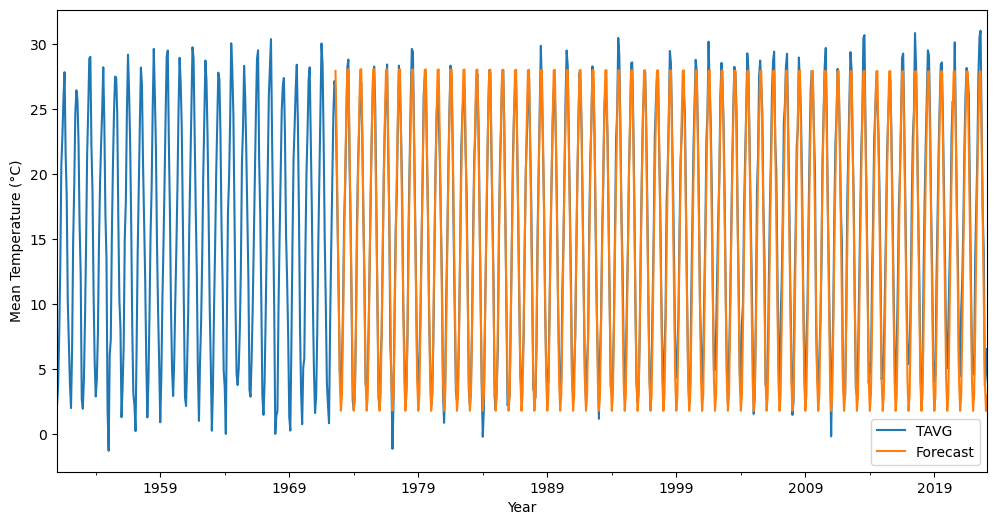

In [182]:
# 30:70 plot

ax = temp.plot(label='Observed', figsize=(12,6))
pred3070.plot(ax=ax, label='Forecast')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Temperature (°C)')
ax.legend()

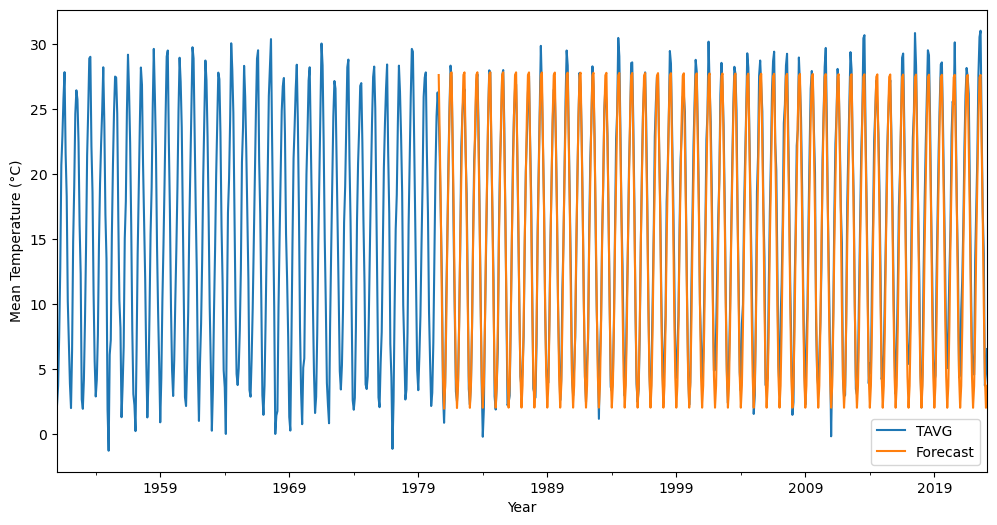

In [183]:
# 40:60 plot

ax = temp.plot(label='Observed', figsize=(12,6))
pred4060.plot(ax=ax, label='Forecast')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Temperature (°C)')
ax.legend()

In [184]:
pred4060

1980-08-31    27.646709
1980-09-30    22.635702
1980-10-31    16.845356
1980-11-30     9.879042
1980-12-31     4.316613
                ...    
2022-10-31    16.796607
2022-11-30     9.838993
2022-12-31     4.441035
2023-01-31     2.033126
2023-02-28     3.722941
Freq: M, Name: predicted_mean, Length: 511, dtype: float64

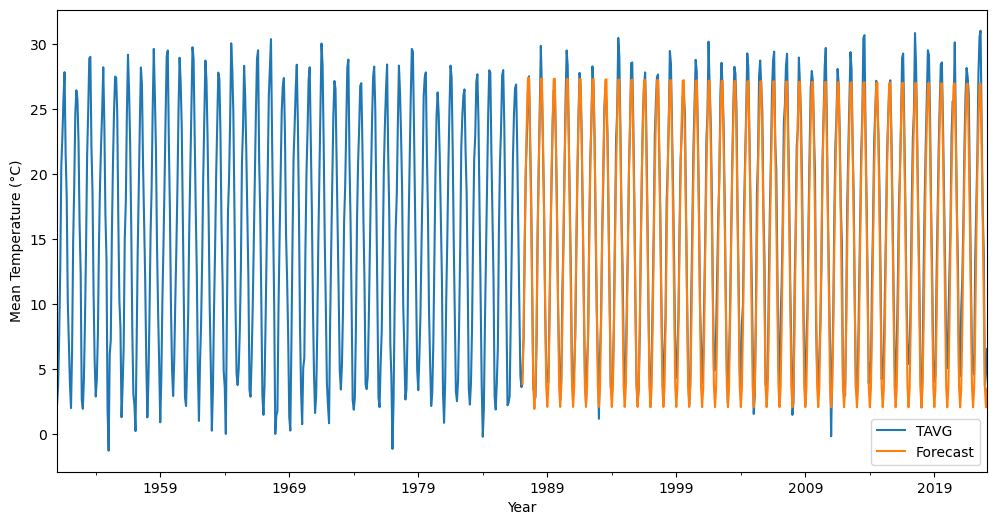

In [185]:
# 50:50 plot

ax = temp.plot(label='Observed', figsize=(12,6))
pred5050.plot(ax=ax, label='Forecast')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Temperature (°C)')
ax.legend()

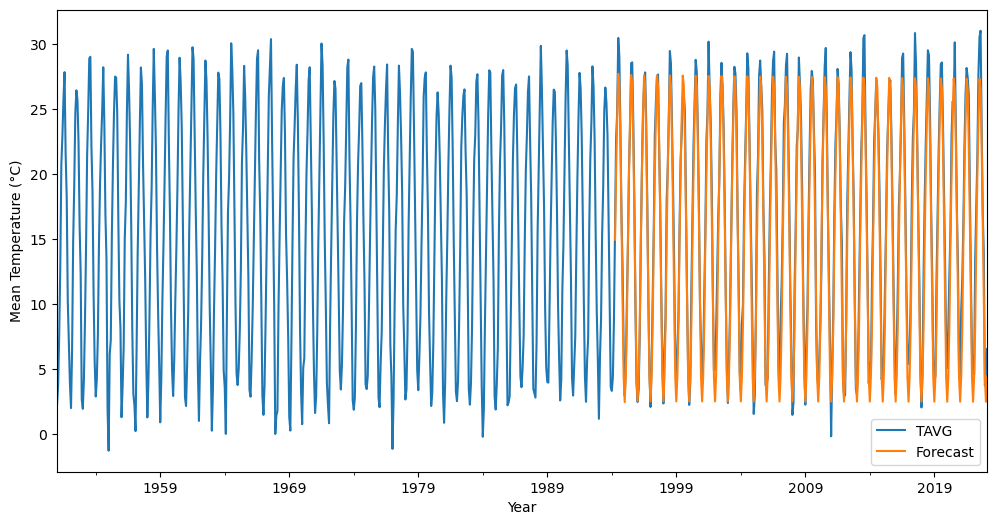

In [186]:
# 60:40 plot

ax = temp.plot(label='Observed', figsize=(12,6))
pred6040.plot(ax=ax, label='Forecast')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Temperature (°C)')
ax.legend()

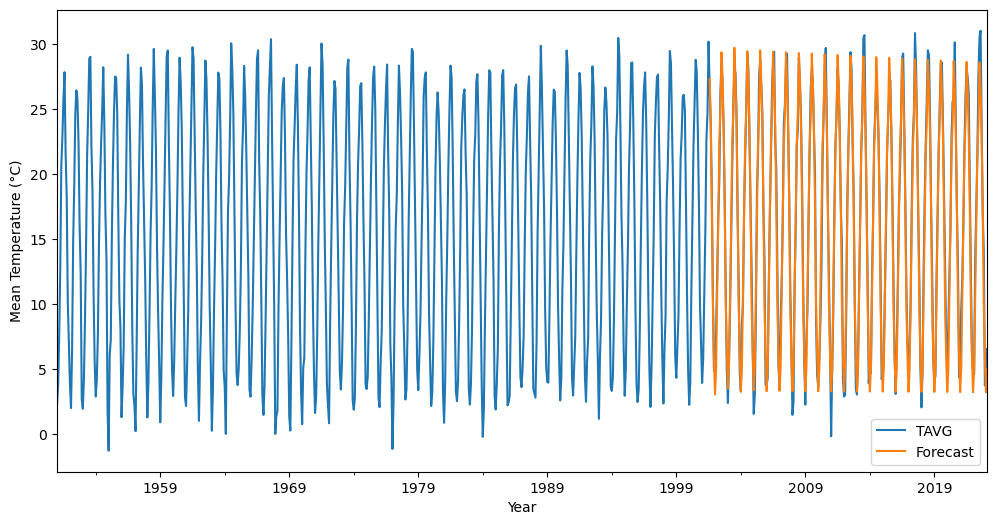

In [187]:
# 70:30 plot

ax = temp.plot(label='Observed', figsize=(12,6))
pred7030.plot(ax=ax, label='Forecast')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Temperature (°C)')
ax.legend()

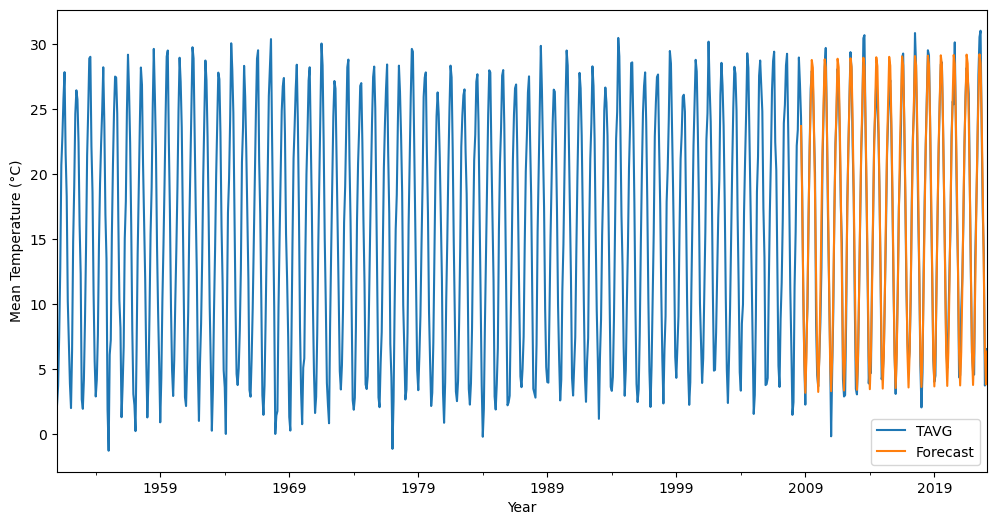

In [188]:
# 80:20 plot

ax = temp.plot(label='Observed', figsize=(12,6))
pred8020.plot(ax=ax, label='Forecast')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Temperature (°C)')
ax.legend()

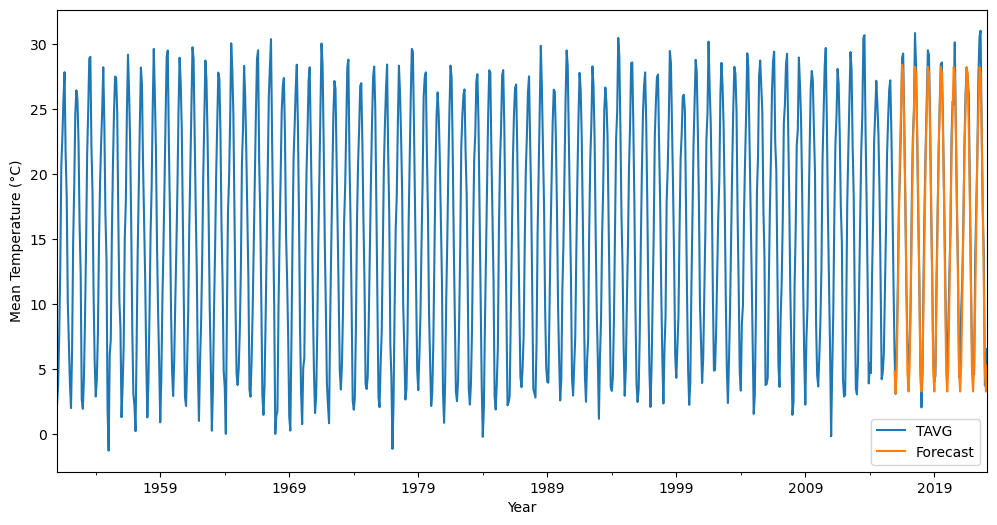

In [189]:
# 90:10 plot

ax = temp.plot(label='Observed', figsize=(12,6))
pred9010.plot(ax=ax, label='Forecast')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Temperature (°C)')
ax.legend()

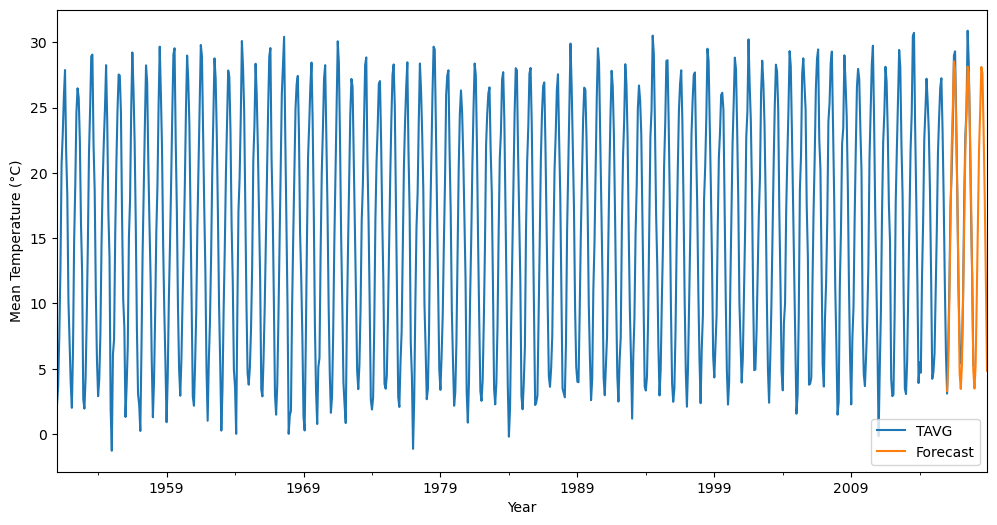

In [190]:
# Research plot

tempR = temp.loc[:"2017-12-31"]

ax = tempR.plot(label='Observed', figsize=(12,6))
predR.plot(ax=ax, label='Forecast')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Temperature (°C)')
ax.legend()

## Calculating MAPE

In [191]:
from sklearn.metrics import mean_absolute_percentage_error

In [192]:
# 30:70 MAPE

mape3070 = mean_absolute_percentage_error(test3070, pred3070)
print("30:70 MAPE: ", mape3070)

30:70 MAPE:  0.1798265832075445


In [193]:
# 40:60 MAPE

mape4060 = mean_absolute_percentage_error(test4060, pred4060)
print("40:60 MAPE: ", mape4060)

40:60 MAPE:  0.18184550997449692


In [194]:
# 50:50 MAPE

mape5050 = mean_absolute_percentage_error(test5050, pred5050)
print("50:50 MAPE: ", mape5050)

50:50 MAPE:  0.17598164670878347


In [195]:
# 60:40 MAPE

mape6040 = mean_absolute_percentage_error(test6040, pred6040)
print("60:40 MAPE: ", mape6040)

60:40 MAPE:  0.18088024839147096


In [196]:
# 70:30 MAPE

mape7030 = mean_absolute_percentage_error(test7030, pred7030)
print("70:30 MAPE: ", mape7030)

70:30 MAPE:  0.20970790420888494


In [197]:
# 80:20 MAPE

mape8020 = mean_absolute_percentage_error(test8020, pred8020)
print("80:20 MAPE: ", mape8020)

80:20 MAPE:  0.22821070408741911


In [198]:
# 90:10 MAPE

mape9010 = mean_absolute_percentage_error(test9010, pred9010)
print("90:10 MAPE: ", mape9010)

90:10 MAPE:  0.11103411975724724


In [199]:
# Research MAPE

mapeR = mean_absolute_percentage_error(testR, predR)
print("Research MAPE: ", mapeR)

Research MAPE:  0.08378786216814225


In [200]:
# Research MSE

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(testR, predR)
print("Research MSE: ", mse)

# in the paper, the MSE is 0.89

Research MSE:  1.334990940776743


## Plotting MAPE vs Train Test Split Ratio

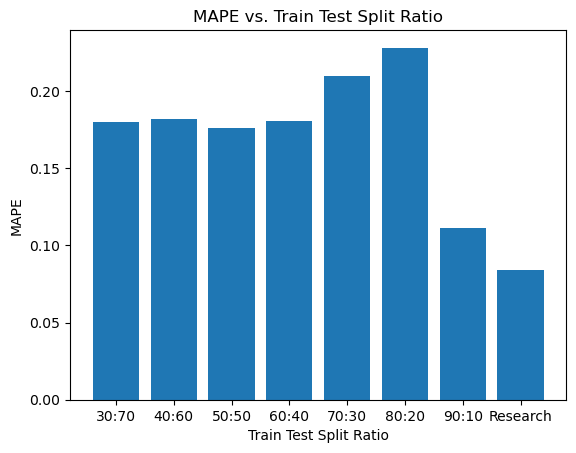

In [202]:
import matplotlib.pyplot as plt

# Define the data
x_axis = ['30:70', '40:60', '50:50', '60:40', '70:30', '80:20', '90:10', 'Research']
y_axis = [mape3070, mape4060, mape5050, mape6040, mape7030, mape8020, mape9010, mapeR]

# Create the chart
plt.bar(x_axis, y_axis)

# Set the chart title and axis labels
plt.title('MAPE vs. Train Test Split Ratio')
plt.xlabel('Train Test Split Ratio')
plt.ylabel('MAPE')

# Show the chart
plt.show()
